<a href="https://colab.research.google.com/github/RoshanAswal/Emotion_Based_Music/blob/main/Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import cv2
from keras.layers import Dense,Conv2D,Dropout,BatchNormalization,Flatten,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import zipfile
!unzip archive.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/archive/train/sad/im1020.png  
  inflating: data/archive/train/sad/im1022.png  
  inflating: data/archive/train/sad/im1023.png  
  inflating: data/archive/train/sad/im1024.png  
  inflating: data/archive/train/sad/im1031.png  
  inflating: data/archive/train/sad/im1033.png  
  inflating: data/archive/train/sad/im1034.png  
  inflating: data/archive/train/sad/im104.png  
  inflating: data/archive/train/sad/im1049.png  
  inflating: data/archive/train/sad/im1058.png  
  inflating: data/archive/train/sad/im1060.png  
  inflating: data/archive/train/sad/im1062.png  
  inflating: data/archive/train/sad/im1065.png  
  inflating: data/archive/train/sad/im1073.png  
  inflating: data/archive/train/sad/im1076.png  
  inflating: data/archive/train/sad/im1084.png  
  inflating: data/archive/train/sad/im1087.png  
  inflating: data/archive/train/sad/im1088.png  
  inflating: data/archive/train/sad/im109.png  
  inflating: data/ar

In [ ]:
import cv2 as cv
import os
data=[]
label=[]
emotions={"angry":0,"disgusted":1,"fearful":2,"happy":3,"neutral":4,"sad":5,"surprised":6}
for dir in os.listdir('/content/data/archive/'):
  path1='/content/data/archive/'+dir
  for em in os.listdir(path1):
    path2='/content/data/archive/'+dir+'/'+em
    for filename in os.listdir(path2):
      if filename.endswith('png'):
          img=Image.open(path2+'/'+filename)
          img=np.array(img)
          img=np.expand_dims(img,axis=-1)
          img=img.repeat(3,axis=-1)
          data.append(img)
          label.append(emotions[em.split('.')[0]])
      

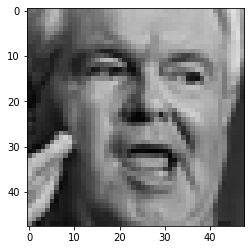

(48, 48, 3)


In [ ]:
plt.imshow(data[0])
plt.show()
print(data[0].shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2,shuffle=True,random_state=42)

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
print(x_train[0])

[[[ 99  99  99]
  [128 128 128]
  [144 144 144]
  ...
  [ 51  51  51]
  [ 53  53  53]
  [ 59  59  59]]

 [[107 107 107]
  [133 133 133]
  [142 142 142]
  ...
  [ 52  52  52]
  [ 53  53  53]
  [ 56  56  56]]

 [[114 114 114]
  [137 137 137]
  [147 147 147]
  ...
  [ 58  58  58]
  [ 57  57  57]
  [ 56  56  56]]

 ...

 [[122 122 122]
  [130 130 130]
  [133 133 133]
  ...
  [ 62  62  62]
  [ 63  63  63]
  [ 63  63  63]]

 [[118 118 118]
  [124 124 124]
  [128 128 128]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 63  63  63]]

 [[110 110 110]
  [114 114 114]
  [120 120 120]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 63  63  63]]]


In [ ]:
x_train=x_train.reshape(x_train.shape[0],48,48,3)
x_test=x_test.reshape(x_test.shape[0],48,48,3)
print(x_train[0])

[[[ 99  99  99]
  [128 128 128]
  [144 144 144]
  ...
  [ 51  51  51]
  [ 53  53  53]
  [ 59  59  59]]

 [[107 107 107]
  [133 133 133]
  [142 142 142]
  ...
  [ 52  52  52]
  [ 53  53  53]
  [ 56  56  56]]

 [[114 114 114]
  [137 137 137]
  [147 147 147]
  ...
  [ 58  58  58]
  [ 57  57  57]
  [ 56  56  56]]

 ...

 [[122 122 122]
  [130 130 130]
  [133 133 133]
  ...
  [ 62  62  62]
  [ 63  63  63]
  [ 63  63  63]]

 [[118 118 118]
  [124 124 124]
  [128 128 128]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 63  63  63]]

 [[110 110 110]
  [114 114 114]
  [120 120 120]
  ...
  [ 62  62  62]
  [ 62  62  62]
  [ 63  63  63]]]


In [ ]:
emotion_label={0:"angry",1:"disgusted",2:"fearful",3:"happy",4:"neutral",5:"sad",6:"surprised"}

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 1. 0. 0.]


In [ ]:
datagen_gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
testgen_gen=ImageDataGenerator(rescale=1./255)
datagen_gen.fit(x_train)

In [ ]:
print(x_train[0].shape)

(48, 48, 3)


In [ ]:
print(len(x_train))
print(len(x_test))

28708
7178


In [ ]:
train=datagen_gen.flow(x_train,y_train,batch_size=64)
test=testgen_gen.flow(x_test,y_test,batch_size=64)

In [ ]:
print(len(train))
print(len(test))

449
113


In [ ]:
from keras.backend import pool2d
from keras.regularizers import l2
base_model=tf.keras.applications.ResNet50(weights='imagenet',include_top=False,input_shape=(48,48,3))
model=Sequential()
model.add(base_model)
for layers in model.layers[:-4]:
  layers.trainable=False

model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7,activation='softmax'))
model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 2, 2, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 batch_normalization_1 (Batc  (None, 32)               12

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
his=model.fit(train,
              epochs=100,
              verbose=True,
              validation_data=test,
              shuffle=True)

Epoch 1/100
449/449 [==============================] - 68s 104ms/step - loss: 2.2414 - acc: 0.1855 - val_loss: 1.8323 - val_acc: 0.2510
Epoch 2/100
449/449 [==============================] - 39s 86ms/step - loss: 1.8880 - acc: 0.2196 - val_loss: 1.8173 - val_acc: 0.2510
Epoch 3/100
449/449 [==============================] - 39s 87ms/step - loss: 1.8214 - acc: 0.2425 - val_loss: 1.7898 - val_acc: 0.2586
Epoch 4/100
449/449 [==============================] - 41s 91ms/step - loss: 1.7919 - acc: 0.2538 - val_loss: 1.7362 - val_acc: 0.2927
Epoch 5/100
449/449 [==============================] - 39s 86ms/step - loss: 1.7193 - acc: 0.2939 - val_loss: 1.7472 - val_acc: 0.2605
Epoch 6/100
449/449 [==============================] - 39s 86ms/step - loss: 1.5988 - acc: 0.3585 - val_loss: 1.5879 - val_acc: 0.3846
Epoch 7/100
449/449 [==============================] - 40s 89ms/step - loss: 1.5362 - acc: 0.3900 - val_loss: 1.5611 - val_acc: 0.3844
Epoch 8/100
449/449 [==============================] -

Text(0.5, 0, 'Epoch')

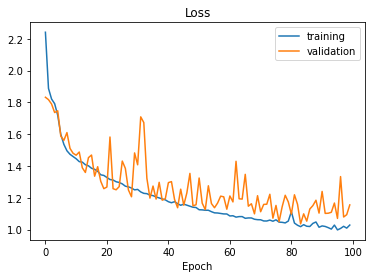

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

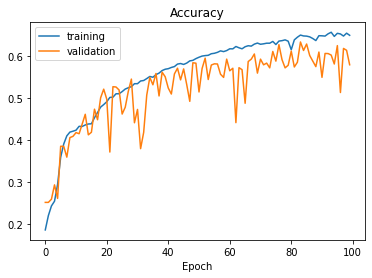

In [ ]:
plt.plot(his.history['acc'])
plt.plot(his.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [ ]:
model.save_weights('model2.h5')
from google.colab import files
files.download('model2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>